In [5]:
#A flight is delayed if the delay is more than 0

In [19]:
your_local_path="D:/Python/"

In [20]:
import numpy as np
from numpy import array
import pandas as pd 
%matplotlib inline


flight_data = your_local_path+'flight_data.csv'
flight_df = pd.read_csv(flight_data, index_col = 0, thousands  = ',')

#carrier wise delay
flight_df['delayed'] = flight_df['arr_delay'].apply(lambda x: x >0)
delayed_flight=flight_df[flight_df['delayed'] == True]
delayed_flight['carrier'].value_counts() 



EV    24484
B6    23609
UA    22222
DL    16413
MQ    11693
AA    10706
US     7349
9E     6637
WN     5304
FL     1895
VX     1746
F9      392
YV      258
AS      189
HA       97
OO       10
Name: carrier, dtype: int64

In [ ]:
'''It might be a good idea to look at the proportion of each airline’s flights that were delayed,
rather than just the total number of each airlines delayed flights.'''

In [21]:
delayed_by_carrier = flight_df.groupby(['carrier','delayed']).size().unstack()
delayed_by_carrier[0:]

delayed,False,True
carrier,,
9E,11823,6637
AA,22023,10706
AS,525,189
B6,31026,23609
DL,31697,16413
EV,29689,24484
F9,293,392
FL,1365,1895
HA,245,97


In [22]:
delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
#carrier wise proportion delay
delayed_by_carrier['proportion_delayed'] = delayed_by_carrier[True] / delayed_by_carrier['flights_count']
#Sort by the proportion of flights delayed
delayed_by_carrier_sorted=delayed_by_carrier.sort_values('proportion_delayed', ascending=False)
delayed_by_carrier_sorted[0:]

delayed,False,True,flights_count,proportion_delayed
carrier,,,,
FL,1365,1895,3260,0.581288
F9,293,392,685,0.572263
EV,29689,24484,54173,0.451959
MQ,14704,11693,26397,0.442967
B6,31026,23609,54635,0.432122
WN,6971,5304,12275,0.432098
YV,343,258,601,0.429285
UA,36443,22222,58665,0.378795
9E,11823,6637,18460,0.359534


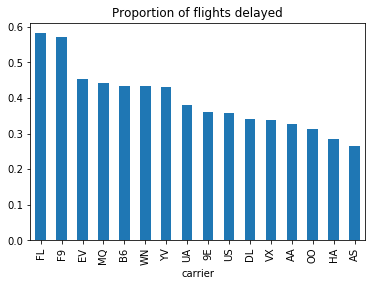

In [23]:
#Sort by the proportion of flights delayed in graphical format
delayed_by_carrier_sorted['proportion_delayed'].plot(kind='bar', title='Proportion of flights delayed')

In [24]:
#Calculate the proportion of total flights delayed

tot_delayed_by_carrier=delayed_by_carrier[True].sum()
total_flights_count=delayed_by_carrier['flights_count'].sum()
proportion_of_total_flights_delayed=tot_delayed_by_carrier/total_flights_count
print(proportion_of_total_flights_delayed)

0.3949331306268855
